<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/CNN_Pooling_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem With Convolution-**

In convolution , we have image and filter. We perform convolution process on image with the help of filter/kernel and we get feature map as the output.There is lot of multiplication operations involved in the convolution process so it requires huge memory.We need to reduce the size of feature map. One way of reducing the feature map size is to increase the stride value.

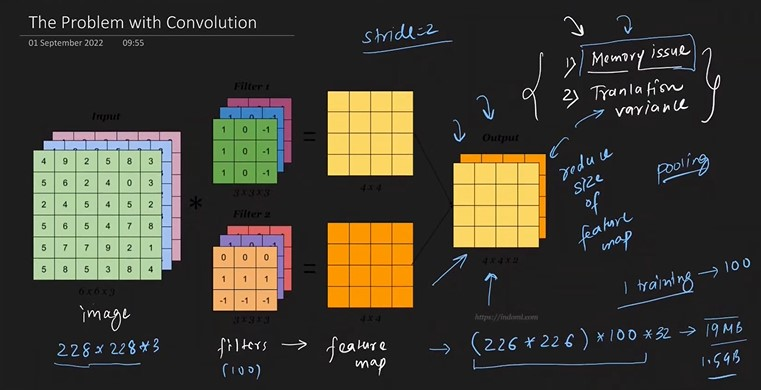

**Translation Variation-**

When convolution process takes place , its work is to find out the features in the data.If the data is cat then its feature could be eyes, ears, hairs, height etc.When convolution extracts features it becomes location dependant so if a perticular feature say ear is at the perticular position then model will learn the feature ear along with its position. But for us, position of the ear is irrelevent. If ear is at any position it should learn and detect.So for different position ear model will detect them as different ear.So the features extracted comes with the tied up position which is not at all required.And this is known as Translation Variation. We require the features in Translation Invariance form which means if feature is at any position our model should treat it as same thing. And this problem is solved by **Pooling Layer**.

Pooling is the process of down sampling of feature map which results in the features becomes location independant which is it becomes translation Invariant.


These are the issues why we use Pooling Layer in CNN.

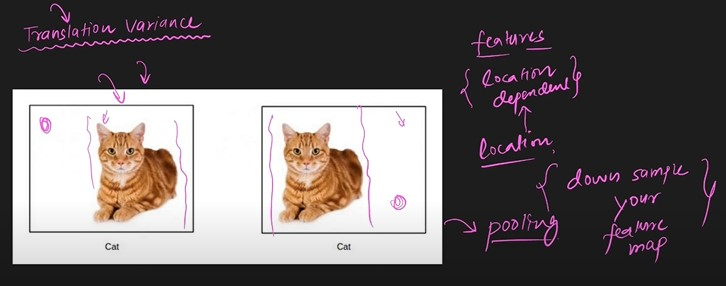

**Pooling Process-**

Pooling is a downsampling operation.In CNN , pooling process is done after convolution process.In convolution process we get a feature map as output. We add non-linerity by applying activation function (ReLU). As soon as we get non-linear feature map,we apply pooling operation.Most popular pooling process is Max Pooling . Some of the other poolings are min,avg,L2 and Global pooling.We have to decide which pooling process to use.

In pooling process,We define size of the pooling like(2,2) , strides applied while performing Pooling process like (2) and type of pooling like- max. We will get the feature map again with translation variation feature. Observe below image-

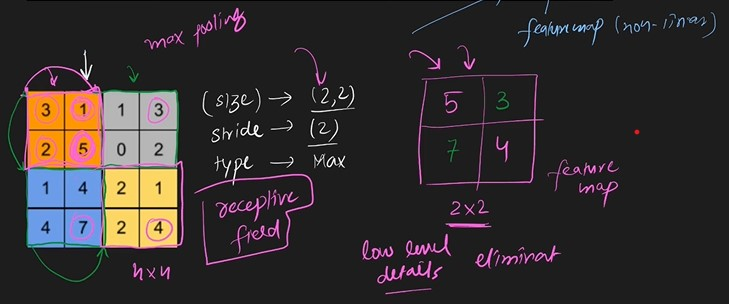


If you consider the max pooling process, what we are basically doing is selecting the value which is highest which means we are selecting the most important feature available in that region and ignoring the non-important features or less important features.This whole process brings the translation invariance in the feature selection.

Observe the max-pooling operation on image which has 8 written over it. It gives output with image 8 having lesser number of pixels.

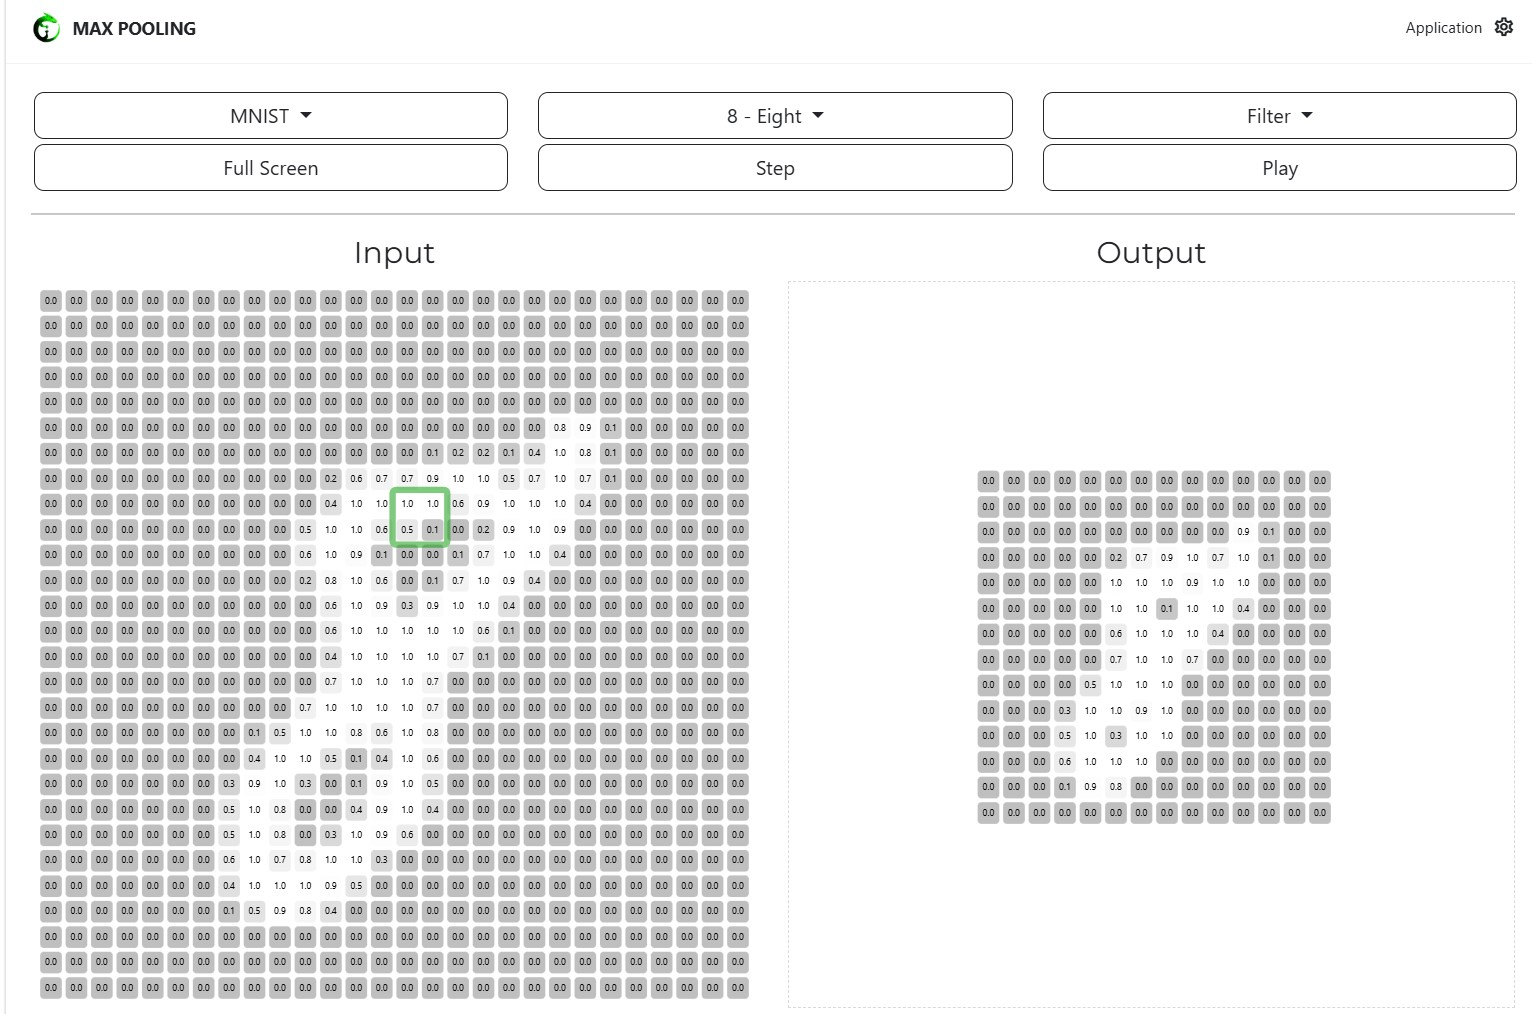

**Pooling On Volume-**

We have 6 * 6 * 3 image. We will apply convolution process on this image with 2 different 3 * 3 * 3 kernels.We will get 2 different feature map of 4 * 4 pixels having single channel.We will consider these two different feature maps as a single volume. We will apply ReLU activation function on this volume to introduce non-linearity. If we have multiple feature maps then we will apply pooling process individully on each feature maps.So in result we will get the multiple feature maps of pooling layer.

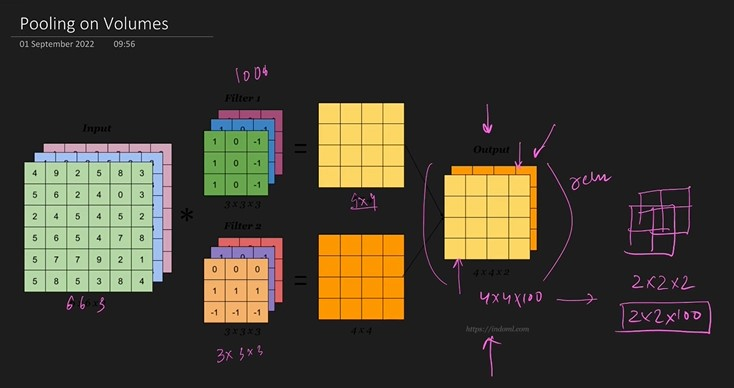

**Now we will apply max-pooling with help of keras **

In [1]:
#Importing dependencies
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [3]:
#Loading dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Define model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()
#In max pooling layer there is 0 trainable parameters.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

**Advantage Of Pooling Process-**

Pooling reduces the size of the feature map.Here observe after applying pooling process, we have the size of original image 228 * 228 * 3 converted into 113 * 113 * 100

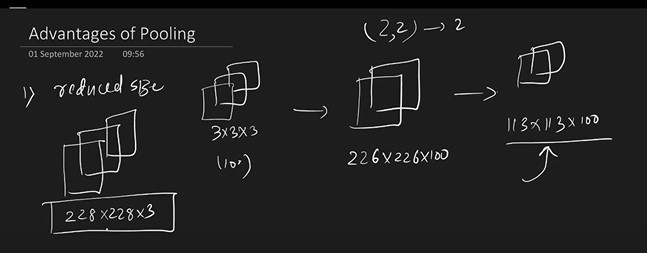


Pooling introduces Translation Invariance to the feature map which means we are not concerned about the position of feature and we are only concerned about whether that feature is available or not.

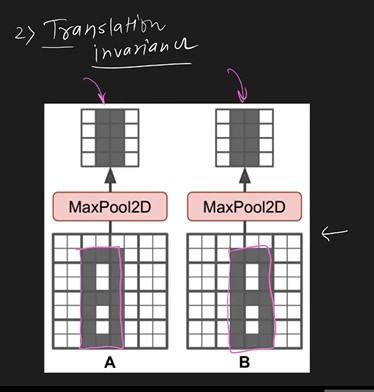


Pooling enhances the features only in max-pooling process.

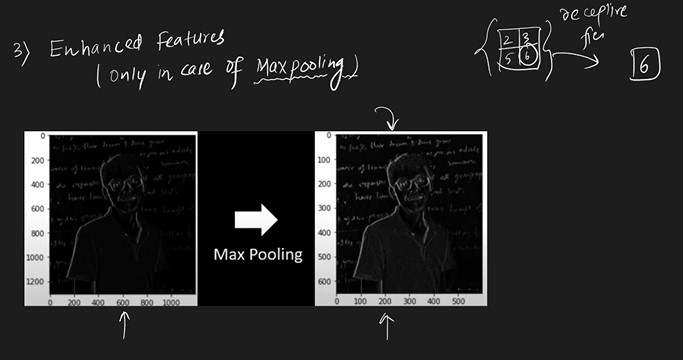

There is no need of training in the pooling process.There is only aggregate function according to the type of pooling you want to use.Which means there will be max function in case of max pooling , min function in case of min pooling , and avg function in case of avg pooling process.

There are 3 types of pooling process in keras namely - max pooling, avg pooling and global pooling. In global pooling , there is global max pooling and global avg pooling.

**Disadvantage of Pooling Layer- **

1)We can not use the pooling in case of Image Segmentation process.In image segmantation the position of the image matters,and the output we get from pooling process is position independant.

2)Pooling process losses lot of information in Pooling process.